# **Qual o próximo hit do Spotify?**

## **Introdução**

&ensp; Neste projeto, foi desenvolvido um modelo preditivo para antecipar a popularidade de músicas no Spotify. Utilizando um conjunto de dados com mais de 100 mil faixas e características como atributos acústicos, metadados e popularidade, o objetivo foi criar um sistema capaz de prever o sucesso de uma música antes de seu lançamento.

## **Bibliotecas Necessárias**

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## **Limpeza e Tratamento de Valores Nulos**

&ensp; Nesta seção, é realizado o processo de limpeza, incluindo o tratamento de valores ausentes e *outliers* que possam distorcer os resultados, para garantir que eles não comprometam a integridade das análises e do modelo.

In [33]:
# Carregar os dados
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [34]:
# Conhecer os dados
train_data.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0


In [35]:
# Conhecer todas as features
train_data.columns

Index(['track_unique_id', 'track_id', 'artists', 'album_name', 'track_name',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre',
       'popularity_target'],
      dtype='object')

In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

In [37]:
# Verificar a existência de dados duplicados
duplicados = train_data[train_data.duplicated(keep='first')]
print(duplicados)

Empty DataFrame
Columns: [track_unique_id, track_id, artists, album_name, track_name, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre, popularity_target]
Index: []

[0 rows x 21 columns]


## **Exploração e Visualização dos Dados**

&ensp; A análise exploratória tem como objetivo entender melhor a estrutura dos dados e identificar padrões. Para isso, são utilizadas visualizações como histogramas, gráficos de dispersão e gráficos de barras para investigar a distribuição das variáveis numéricas e categóricas. Além disso, analisa-se correlações e relações entre variáveis como gênero musical, características acústicas e popularidade das faixas, o que ajuda a guiar decisões em relação à formulação de hipóteses e à seleção de *features*.

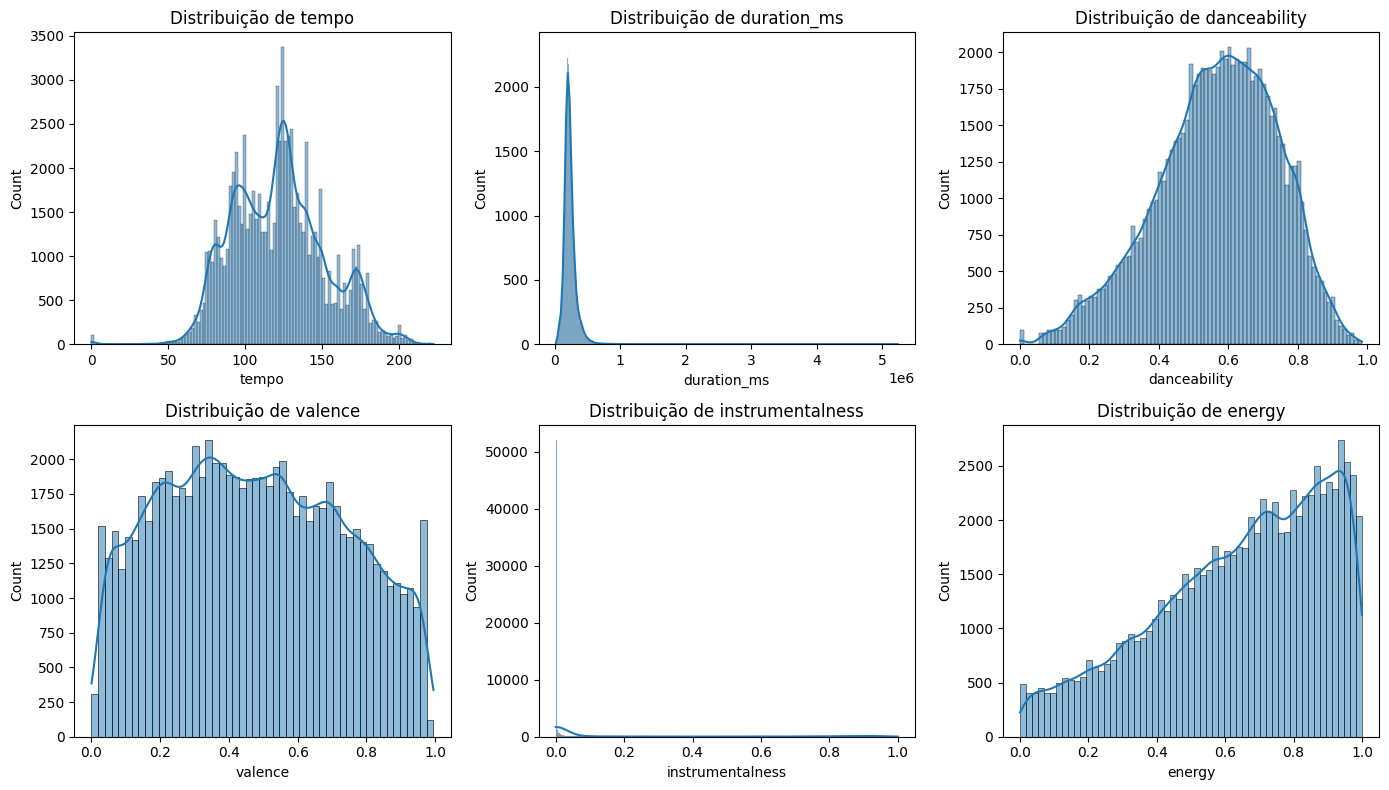

In [38]:
# Selecionar variáveis numéricas
numeric_columns = ['tempo', 'duration_ms', 'danceability', 'valence', 'instrumentalness', 'energy']

# Plotar histogramas para visualizar a distribuição das variáveis numéricas
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

&ensp;

&ensp; Acima, o *plot* de histogramas exibe a distribuição de variáveis como ``tempo``, ``danceability``, ``valence``, etc. Em seguida, como observado no código a seguir, o *heatmap* de correlação pode ser usado para identificar a relação entre essas variáveis numéricas.

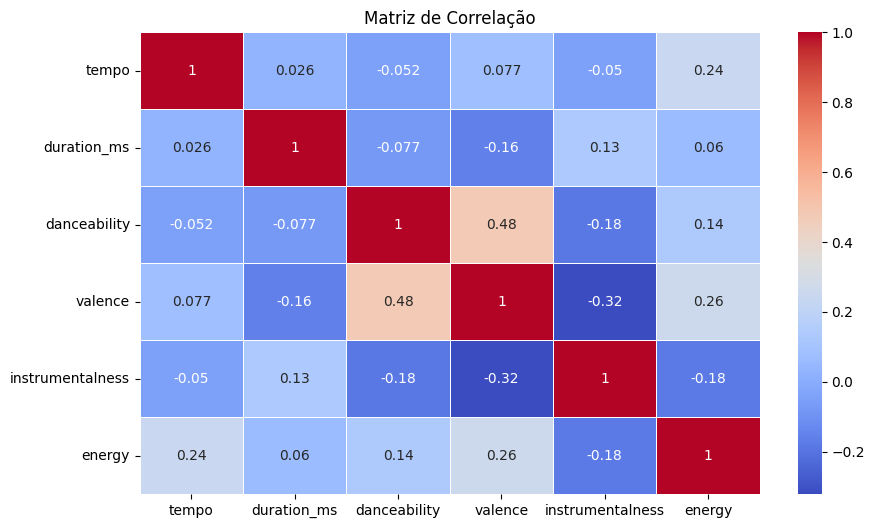

In [39]:
# Matriz de correlação
corr_matrix = train_data[numeric_columns].corr()

# Heatmap de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

&ensp; O gráfico de barras abaixo demonstra quais gêneros são mais frequentes no conjunto de dados.

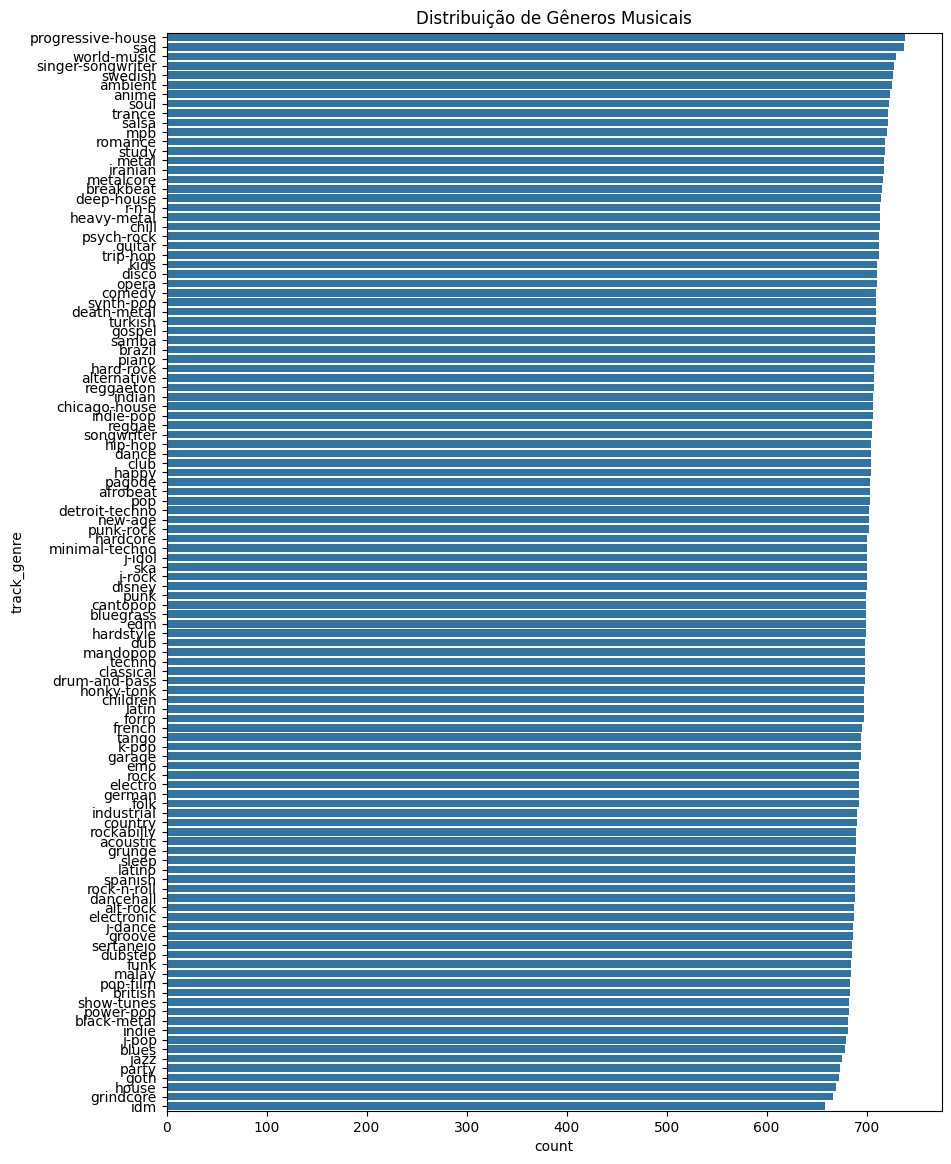

In [40]:
# Contagem de faixas por gênero
plt.figure(figsize=(10, 14))
sns.countplot(y=train_data['track_genre'], order=train_data['track_genre'].value_counts().index)
plt.title('Distribuição de Gêneros Musicais')
plt.show()

&ensp; Notavelmente, são muitos os gêneros musicais. Então, é gerado abaixo o mesmo gráfico, só que, dessa vez, filtrando apenas os 25 tipos mais frequentes, para melhor visualização.

C:\Users\Inteli\AppData\Local\Temp\ipykernel_4380\3318317938.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_data['track_genre'], order=top_25_genres.index, palette='viridis')


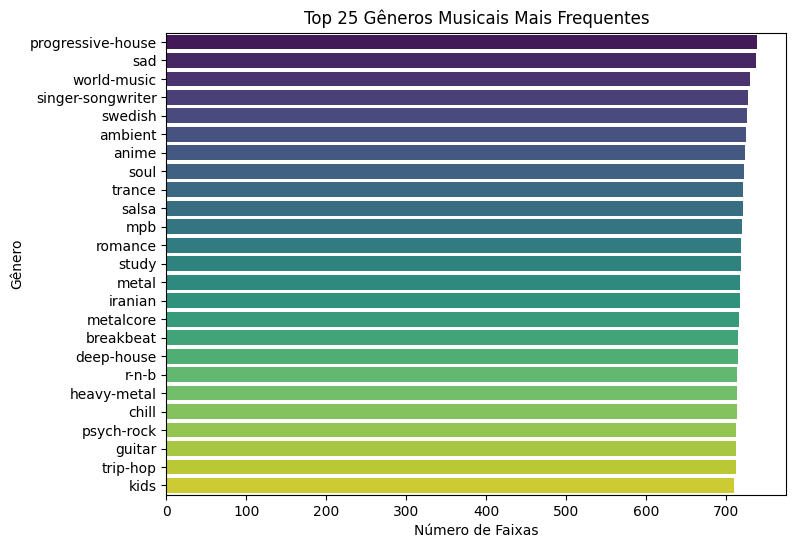

In [41]:
# Contagem dos 25 gêneros mais frequentes
top_25_genres = train_data['track_genre'].value_counts().nlargest(25)

# Gráfico de barras para os 25 gêneros mais frequentes
plt.figure(figsize=(8, 6))
sns.countplot(y=train_data['track_genre'], order=top_25_genres.index, palette='viridis')
plt.title('Top 25 Gêneros Musicais Mais Frequentes')
plt.xlabel('Número de Faixas')
plt.ylabel('Gênero')
plt.show()

&ensp; Por fim, para variáveis como ``explicit``, é interessante observar a distribuição de popularidade em faixas explícitas e não explícitas. O gráfico de barras a seguir traz tal visualização.

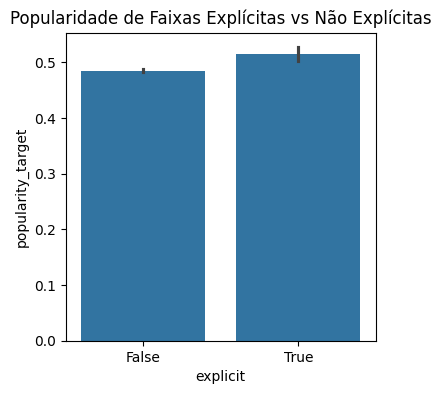

In [42]:
# Popularidade de faixas explícitas
plt.figure(figsize=(4, 4))
sns.barplot(x='explicit', y='popularity_target', data=train_data)
plt.title('Popularidade de Faixas Explícitas vs Não Explícitas')
plt.show()

## **Formulação de Hipóteses**

&ensp; Nesta seção, apresentam-se hipóteses que possam explicar os fatores que influenciam a popularidade das músicas no Spotify. Com base na análise exploratória dos dados, o objetivo é identificar padrões e relações entre características como o gênero musical, atributos acústicos e a popularidade. As hipóteses formuladas serão testadas posteriormente, orientando as escolhas de *features* e ajustes no modelo preditivo.

### **Hipótese 1:** Músicas de artistas consagrados, como Taylor Swift, tendem a ser mais populares.

&ensp; Artistas renomados geralmente possuem uma base de fãs consolidada e recebem mais divulgação, o que pode influenciar diretamente na popularidade de suas músicas. A hipótese sugere que artistas consagrados como Taylor Swift têm uma tendência natural a lançar faixas que rapidamente se tornam populares no Spotify, independentemente de outros fatores, como características acústicas da música.

In [43]:
# Filtrar músicas da Taylor Swift
taylor_songs = train_data[train_data['artists'] == 'Taylor Swift']

# Calcular a popularidade média das músicas da Taylor Swift
taylor_avg_popularity = taylor_songs['popularity_target'].mean()

# Calcular a popularidade média geral
overall_avg_popularity = train_data['popularity_target'].mean()

# Comparar
print(f'Popularidade média das músicas da Taylor Swift: {taylor_avg_popularity}')
print(f'Popularidade média geral: {overall_avg_popularity}')

Popularidade média das músicas da Taylor Swift: 0.625
Popularidade média geral: 0.4878446115288221


&ensp; Os dados confirmam que músicas especificamente de Taylor Swift têm popularidade acima da média, por isso, conclui-se que a reputação e visibilidade de artistas consagrados devem ser fatores relevantes para o sucesso de suas faixas.



### **Hipótese 2:** Músicas de gêneros populares como ``Pop`` tendem a ser mais populares no Spotify.

&ensp; Gêneros musicais como ``Pop`` têm maior apelo popular e tendem a ser mais amplamente consumidos nas plataformas de *streaming*. A hipótese propõe que faixas desse gênero têm maior probabilidade de atingir uma popularidade significativa no Spotify, devido à sua acessibilidade e ao fato de serem mais frequentemente promovidas. Sendo o gênero musical um fator determinante no sucesso das faixas, isso pode indicar que, para maximizar o alcance e popularidade, artistas e gravadoras devem investir mais em faixas dentro de gêneros com apelo de massa.

### **Hipótese 3:** Faixas com maior ``danceability`` ou ``energy`` têm maior probabilidade de serem bem-sucedidas.

&ensp; Músicas com alta ``danceability`` (capacidade de ser dançante) e ``energy`` (intensidade) são frequentemente associadas a eventos sociais e festas, o que pode levar a um maior consumo e compartilhamento. Esta hipótese sugere que músicas com essas características tendem a ser mais populares, pois elas criam um ambiente emocional positivo que atrai ouvintes. 

## **Feature Engineering**

&ensp; Nesta seção, são removidas colunas irrelevantes que não contribuem diretamente para a previsão, como ``track_id`` e ``track_name``. Além disso, para lidar com faixas que possuem vários artistas, os nomes dos artistas que estão concatenados por ponto e vírgula (;) são separados e a função ``explode`` é utilizada para expandir cada artista individualmente, criando uma linha separada para cada combinação de faixa e artista. Isso permite uma análise mais granular dos artistas associados a cada música.

In [44]:
# Remover colunas irrelevantes
train_data = train_data.drop(columns=['track_id', 'track_name'])
test_data = test_data.drop(columns=['track_id', 'track_name'])

In [45]:
# Separar os nomes de 'artists'
train_data['artists'] = train_data['artists'].str.split(';')
train_data = train_data.explode('artists')
test_data['artists'] = test_data['artists'].str.split(';')
test_data = test_data.explode('artists')

## **Codificação de Variáveis Categóricas**

&ensp; Para que o modelo de *machine learning* entenda as variáveis categóricas, são aplicadas técnicas de codificação. Usa-se Label Encoding para colunas de alta cardinalidade, como artistas e álbuns, e One-Hot Encoding para variáveis com poucas categorias, como gêneros musicais.

&ensp; O trecho de código abaixo converte a coluna ``explicit``, que originalmente está no formato booleano, para valores inteiros. Essa transformação é necessária porque muitos algoritmos de *machine learning* não aceitam diretamente variáveis booleanas, mas conseguem trabalhar facilmente com valores numéricos. A conversão garante que o modelo consiga interpretar corretamente se a faixa é marcada como "explícita" (1) ou "não explícita" (0).

In [46]:
# Converter 'explicit' de bol para int
train_data['explicit'] = train_data['explicit'].astype(int)
test_data['explicit'] = test_data['explicit'].astype(int)

&ensp; No código, aplicamos Label Encoding às colunas de ``artists`` e ``album_name``, que possuem alta cardinalidade, ou seja, muitos valores distintos. O LabelEncoder converte cada valor único (nome de artista ou álbum) em um número inteiro, permitindo que o modelo de *machine learning* interprete essas variáveis categóricas. Para garantir que rótulos presentes no conjunto de teste, mas ausentes no treino, sejam tratados adequadamente, utilizamos a função ``safe_label_transform``. Essa função atribui um valor padrão, como ``-1``, para qualquer valor não visto no conjunto de treino, evitando erros de "rótulos não vistos", a fim de que o modelo possa lidar com novos artistas ou álbuns no conjunto de teste sem comprometer a integridade dos dados.

In [47]:
# Criar um objeto LabelEncoder
label_encoder = LabelEncoder()

# Identificar colunas categóricas que serão codificadas
colunas_categoricas = ['artists', 'album_name', 'track_genre']

# Fazer uma cópia dos dados de treino e teste para aplicar a codificação
df_train_labelencoded = train_data.copy()
df_test_labelencoded = test_data.copy()

# Função para tratar valores não vistos no conjunto de teste
def safe_label_transform(encoder, data, default_value=-1):
    """Transforma os valores usando um LabelEncoder e trata rótulos não vistos."""
    encoded_data = []
    for item in data:
        if item in encoder.classes_:
            encoded_data.append(encoder.transform([item])[0])
        else:
            encoded_data.append(default_value)  # Valor padrão para rótulos não vistos
    return np.array(encoded_data)

# Aplicar Label Encoding nas colunas categóricas
for coluna in colunas_categoricas:
    # Ajustar o label encoder nos dados de treino
    df_train_labelencoded[coluna] = label_encoder.fit_transform(df_train_labelencoded[coluna])
    
    # Aplicar a transformação nos dados de teste com tratamento de valores não vistos
    df_test_labelencoded[coluna] = safe_label_transform(label_encoder, df_test_labelencoded[coluna])

# Exibir informações sobre o dataset após a codificação
print("df_train_labelencoded (base com Label Encoding):")
df_train_labelencoded.info()

df_train_labelencoded (base com Label Encoding):
<class 'pandas.core.frame.DataFrame'>
Index: 110693 entries, 0 to 79799
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   track_unique_id    110693 non-null  int64  
 1   artists            110693 non-null  int64  
 2   album_name         110693 non-null  int64  
 3   duration_ms        110693 non-null  int64  
 4   explicit           110693 non-null  int64  
 5   danceability       110693 non-null  float64
 6   energy             110693 non-null  float64
 7   key                110693 non-null  int64  
 8   loudness           110693 non-null  float64
 9   mode               110693 non-null  int64  
 10  speechiness        110693 non-null  float64
 11  acousticness       110693 non-null  float64
 12  instrumentalness   110693 non-null  float64
 13  liveness           110693 non-null  float64
 14  valence            110693 non-null  float64
 15  tempo   

&ensp; Para a coluna de ``track_genre``, é aplicado One Hot Encoding, uma técnica que converte cada categoria única (gênero musical) em uma nova coluna binária. Utilizamos o parâmetro ``drop='first'`` para evitar multicolinearidade, removendo uma das categorias geradas. O resultado é que cada gênero musical é representado por uma coluna com valores ``0`` ou ``1``. Após o One Hot Encoding, o índice dos dataframes é redefinido para garantir que os índices sejam únicos e, em seguida, as novas colunas são concatenadas ao dataframe original, permitindo que o modelo interprete os gêneros musicais sem aumentar excessivamente a dimensionalidade dos dados.

In [48]:
# One Hot Encoding para a coluna de gênero (track_genre)
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' para evitar multicolinearidade

# Ajustando o OneHotEncoder nos dados de treino
train_genre_encoded = ohe.fit_transform(train_data[['track_genre']])
test_genre_encoded = ohe.transform(test_data[['track_genre']])

# Resetar o índice dos dataframes para garantir índices únicos
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

# Adicionando o resultado do One Hot Encoding ao dataset original
train_data = pd.concat([train_data, pd.DataFrame(train_genre_encoded, columns=ohe.get_feature_names_out(['track_genre']))], axis=1)
test_data = pd.concat([test_data, pd.DataFrame(test_genre_encoded, columns=ohe.get_feature_names_out(['track_genre']))], axis=1)

## **Codificação de Variáveis Numéricas**

&ensp; Nesta etapa, as variáveis numéricas são normalizadas para garantir que todas as *features* estejam na mesma escala e para lidar com possíveis *outliers*. Utilizamos o RobustScaler, que é robusto a valores extremos, para escalonar atributos como duração da música e tempo.

In [49]:
# Normalização de features numéricas
numeric_features = ['tempo', 'duration_ms']

# Aplicar RobustScaler para tratar possíveis outliers
scaler = RobustScaler()
train_data[numeric_features] = scaler.fit_transform(train_data[numeric_features])
test_data[numeric_features] = scaler.transform(test_data[numeric_features])

In [50]:
train_data['num_artists'] = train_data.groupby('track_unique_id')['artists'].transform('count')
test_data['num_artists'] = test_data.groupby('track_unique_id')['artists'].transform('count')


## **Seleção de Features**

&ensp; As variáveis mais relevantes para o modelo de previsão de popularidade das músicas precisam ser selecionadas. Com base na análise exploratória e nas hipóteses formuladas, idenfica-se quais características dos dados, como atributos acústicos e metadados, são mais influentes na previsão da popularidade. O objetivo é garantir que as *features* escolhidas capturem as informações mais significativas para o desempenho do modelo, evitando redundâncias e reduzindo a dimensionalidade desnecessária.

In [54]:
X = df_train_labelencoded[['artists', 'album_name', 'instrumentalness', 
                           'danceability', 'valence', 'tempo', 'duration_ms', 'track_genre']]
                           # list(ohe.get_feature_names_out(['track_genre']))]

# Definir a variável alvo (popularity_target)
y = df_train_labelencoded['popularity_target']

# Selecionar as mesmas features para o conjunto de teste
X_test = df_test_labelencoded[['artists', 'album_name', 'instrumentalness', 
                               'danceability', 'valence', 'tempo', 'duration_ms', 'track_genre']]
                             #  list(ohe.get_feature_names_out(['track_genre']))]

&ensp; Resumidamente, as *features* ``artists`` e ``album_name`` foram incluídas porque artistas consagrados, como Taylor Swift, tendem a lançar músicas populares. ``Instrumentalness`` e ``danceability`` foram escolhidas com a hipótese de que músicas com menos elementos instrumentais e maior capacidade de dança atraem mais ouvintes. ``Valence`` foi selecionada, pois músicas mais positivas emocionalmente tendem a ser mais populares. ``Tempo`` e ``duration_ms`` foram considerados com base na ideia de que faixas rápidas e curtas são mais atrativas em plataformas de *streaming*. Por fim, o ``track_genre`` foi incluído pela sua relação direta com a popularidade, especialmente em gêneros como ``Pop`` e ``Hip-Hop``. Essas escolhas refletem padrões observados e hipóteses levantadas durante a análise.

## **Finetuning de Hiperparâmetros**

&ensp; Para a otimização dos hiperparâmetros do modelo, o GridSearchCV é utilizado. O objetivo é refinar o desempenho do RandomForestClassifier testando várias combinações de parâmetros, como o número de árvores, profundidade máxima das árvores e o número mínimo de amostras para dividir um nó. O GridSearchCV avalia todas as combinações possíveis dentro do *grid* especificado, realizando validação cruzada para garantir que a melhor combinação de hiperparâmetros seja escolhida, o que permite maximizar a acurácia do modelo e evitar *overfitting* ou *underfitting*.

In [55]:
# Definir os hiperparâmetros a serem testados
param_distributions = {
    'n_estimators': [100, 200],        # Número de árvores na floresta
    'max_depth': [10, 30],        # Profundidade máxima da árvore
    'min_samples_split': [2, 6],        # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2],          # Número mínimo de amostras em uma folha
    'bootstrap': [True, False]              # Usar ou não amostragem com substituição
}

# Inicializar o modelo
rf = RandomForestClassifier(random_state=42)

# Inicializar o RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_distributions,
                                   n_iter=50,  # Testar 50 combinações aleatórias
                                   cv=3,       # Validação cruzada com 3 folds
                                   n_jobs=-1,  # Usar todos os núcleos disponíveis
                                   verbose=2, 
                                   scoring='accuracy', 
                                   random_state=42)

# Treinar o RandomizedSearchCV
random_search.fit(X, y)

# Usar o modelo otimizado com os melhores parâmetros
best_rf_model = random_search.best_estimator_

# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", random_search.best_params_)

c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 32 candidates, totalling 96 fits


c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Melhores hiperparâmetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}


## **Treinamento do Modelo**

&ensp; O RandomForestClassifier é utilizado para treinar o modelo, com validação cruzada (K-Fold) para avaliar seu desempenho de forma robusta. Para uma análise completa da performance, são utilizadas as métricas: acurácia, precisão, recall e F1-score.

In [56]:
# Treinamento do modelo otimizado com KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Usar o modelo otimizado com os melhores parâmetros (best_rf_model)
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

for train_index, val_index in kf.split(X):
    X_train_fold, X_valid_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_valid_fold = y.iloc[train_index], y.iloc[val_index]

    # Treinar o modelo otimizado no fold atual
    best_rf_model.fit(X_train_fold, y_train_fold)
    
    # Fazer previsões no conjunto de validação
    valid_preds_fold = best_rf_model.predict(X_valid_fold)

    # Calcular as métricas
    accuracy_list.append(accuracy_score(y_valid_fold, valid_preds_fold))
    precision_list.append(precision_score(y_valid_fold, valid_preds_fold, average='weighted'))
    recall_list.append(recall_score(y_valid_fold, valid_preds_fold, average='weighted'))
    f1_list.append(f1_score(y_valid_fold, valid_preds_fold, average='weighted'))

# Exibir as médias das métricas de desempenho
print(f'Média de Accuracy: {np.mean(accuracy_list)}')
print(f'Média de Precision: {np.mean(precision_list)}')
print(f'Média de Recall: {np.mean(recall_list)}')
print(f'Média de F1 Score: {np.mean(f1_list)}')

Média de Accuracy: 0.8854489553394629
Média de Precision: 0.8854921199200151
Média de Recall: 0.8854489553394629
Média de F1 Score: 0.8854533228508208


## **Submissão**

&ensp; Nesta última etapa, utiliza-se o modelo treinado para gerar previsões sobre o conjunto de teste. Os resultados serão agrupados e o arquivo de submissão é criado, com as previsões de popularidade para cada faixa.

In [59]:
# Fazer previsões no conjunto de teste
best_rf_model.fit(X, y)
test_preds = best_rf_model.predict(X_test)

# Criar arquivo de submissão
submission = pd.DataFrame({
    'track_unique_id': test_data['track_unique_id'],
    'popularity_target': test_preds.astype(int)
})
submission_grouped = submission.groupby('track_unique_id', as_index=False).agg({'popularity_target': 'max'})
submission_grouped.to_csv('submissao.csv', index=False)

## **Conclusão**

&ensp; Através da utilização de algoritmos de aprendizado de máquina, como o Random Forest e técnicas avançadas de otimização de hiperparâmetros como o RandomizedSearchCV, o modelo foi refinado para alcançar um desempenho satisfatório, avaliado com métricas como acurácia, precisão, recall e F1-score.

&ensp; Além disso, a análise exploratória permitiu formular hipóteses sobre os fatores que influenciam a popularidade, como a presença de artistas renomados, gêneros populares e características acústicas específicas. Com a aplicação de K-Fold Cross Validation, a validação do modelo foi realizada, evitando problemas de *overfitting* ou *underfitting*.

&ensp; Por fim, o modelo foi utilizado para gerar previsões sobre o conjunto de teste, abrindo caminho para uma submissão assertiva dos resultados, capaz de ajudar o Spotify a identificar o próximo grande hit da plataforma!